__EzTao__ provides the tools to easily simulate CARMA processes given a valid CARMA kernel. There are three functions in the `ts.carma` module, which can be used to simulate CARMA processes.

- `gpSimFul`: Simulate evenly spaced CARMA processes.
- `gpSimRand`: Simulate CARMA processes with a (uniform) random sampling.
- `gpSimByT`: Simulate CARMA processes at desired timestamps.

Each function take a CARMA kernel as the first argument along with other required or optional arguments. 

*__Note__*:

1. the `SNR` argument is defined as the ratio between the variability amplitude of the input CARMA model and the median of the measurement errors. 
2. The returned time series has the measurement error included 
3. The measurement errors are simulated using a log normal distribution and are assigned to 'measurements' in a heteroskedastic manner.

Next, we will simulate CARMA processes using a DHO/CARMA(2,1) and a CARMA(5,2) model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc_file('https://raw.githubusercontent.com/ywx649999311/configs/master/viz/yuBasic.rc')

from eztao.carma import DHO_term, CARMA_term
from eztao.ts import gpSimFull, gpSimByT
from eztao.ts.carma import sample_carma

In [2]:
## let's checkout the signature of one of the above three functions
gpSimFull?

Signature: gpSimFull(carmaTerm, SNR, duration, N, nLC=1)
Docstring:
Simulate full CARMA time series.

Args:
    carmaTerm (object): celerite GP term.
    SNR (float): Signal to noise ratio defined as ratio between
        CARMA amplitude and the mode of the errors (simulated using
        log normal).
    duration (float): The duration of the simulated time series in days.
    N (int): The number of data points.
    nLC (int, optional): Number of light curves to simulate. Defaults to 1.

Raises:
    RuntimeError: If the input CARMA term/model is not stable, thus cannot be
        solved by celerite.

Returns:
    Arrays: t, y and yerr of the simulated light curves in numpy arrays.
        Note that errors have been added to y.
File:      ~/anaconda3/envs/py37/lib/python3.7/site-packages/eztao/ts/carma.py
Type:      function


### 1. Simulate DHO/CARMA(2,1)
- #### At uniformly spaced timestamps

In [3]:
dho_kernel = DHO_term(np.log(0.04), np.log(0.0027941), np.log(0.004672), 
                      np.log(0.0257))

nLC = 2 # simulate two time series
t, y, yerr = gpSimFull(dho_kernel, 20, 365*3, 1000, nLC=nLC)

In [4]:
print(f'The number returned time series: {y.shape[0]}')

The number returned time series: 2


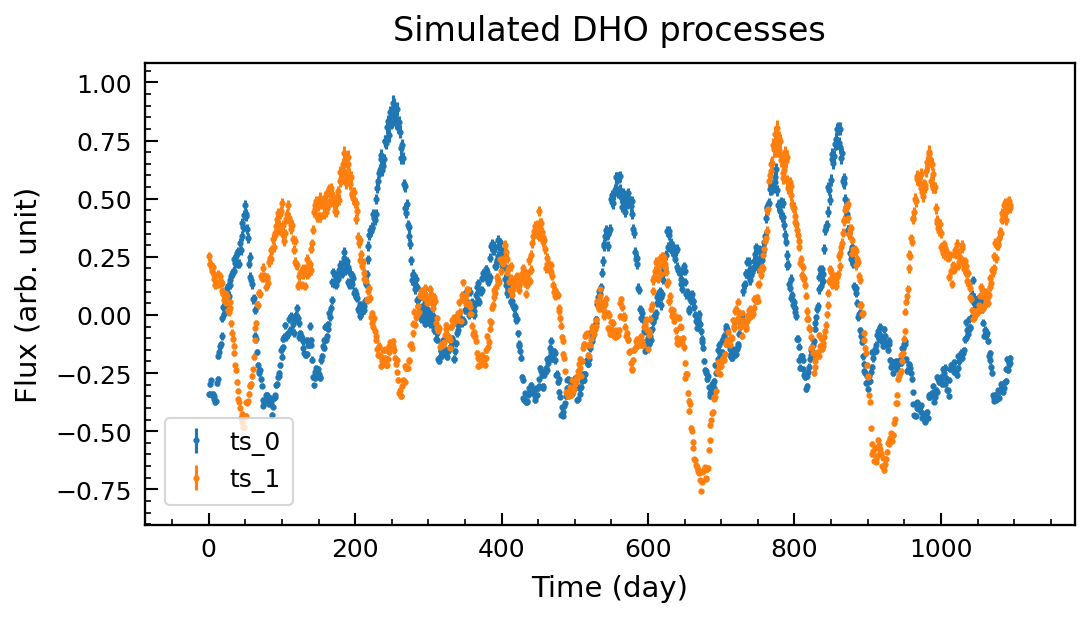

In [5]:
# plot the simulated process
fig, ax = plt.subplots(1,1, dpi=150, figsize=(8,4))

for i in range(nLC):
    ax.errorbar(t[i], y[i], yerr[i], fmt='.', label=f'ts_{i}', markersize=4)

ax.set_xlabel('Time (day)')
ax.set_ylabel('Flux (arb. unit)')
ax.set_title('Simulated DHO processes')
ax.legend(markerscale=1, loc=3)

- #### At provided specific timestamps

In [6]:
# randomly draw timestamps from a log distribution
tIn = np.logspace(0, np.log10(1000), 500)

tOut, yOut, yerrOut = gpSimByT(dho_kernel, 20, tIn, nLC=nLC)

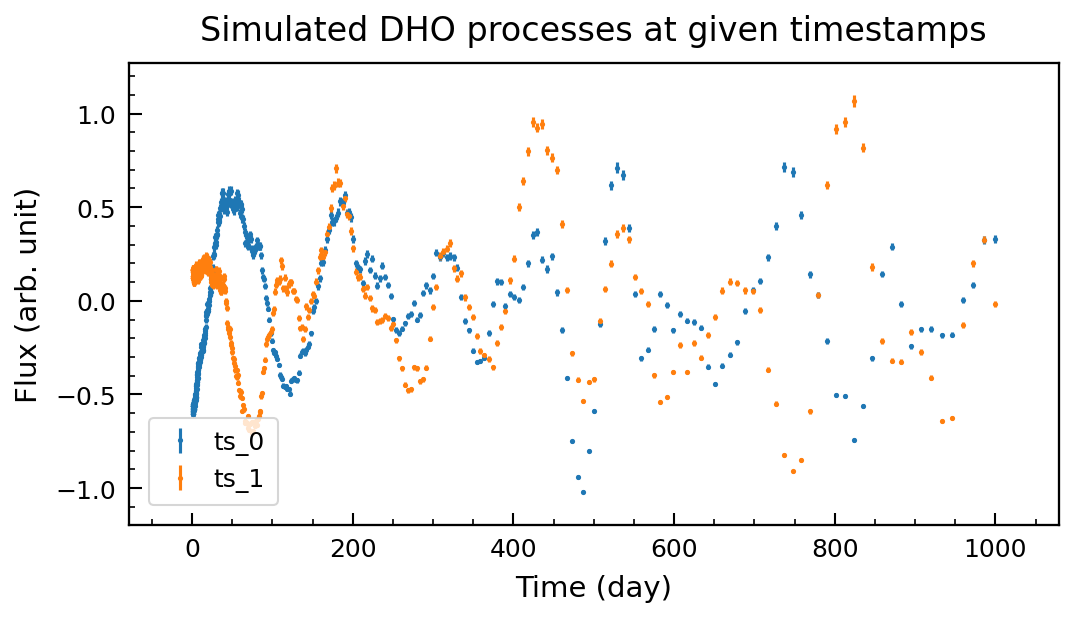

In [7]:
# plot the simulated process
fig, ax = plt.subplots(1,1, dpi=150, figsize=(8,4))

for i in range(nLC):
    ax.errorbar(tOut[i], yOut[i], yerrOut[i], fmt='.', label=f'ts_{i}', markersize=3)

ax.set_xlabel('Time (day)')
ax.set_ylabel('Flux (arb. unit)')
ax.set_title('Simulated DHO processes at given timestamps')
ax.legend(markerscale=1, loc=3)

### 2. Simulate CARMA(5,2)
- #### At uniformly spaced timestamps

In [8]:
ARpars = [6.39255585e-01, 8.19334579e-01, 4.74749350e-01, 
          4.08631157e-02, 7.22707479e-04]
MApars = [7.04646183, 0.10365114, 0.79552856]
carma_kernel = CARMA_term(np.log(ARpars), np.log(MApars))

nLC = 2 # simulate two time series
t, y, yerr = gpSimFull(carma_kernel, 20, 365*3, 1000, nLC=nLC)

In [9]:
print(f'The number returned time series: {y.shape[0]}')

The number returned time series: 2


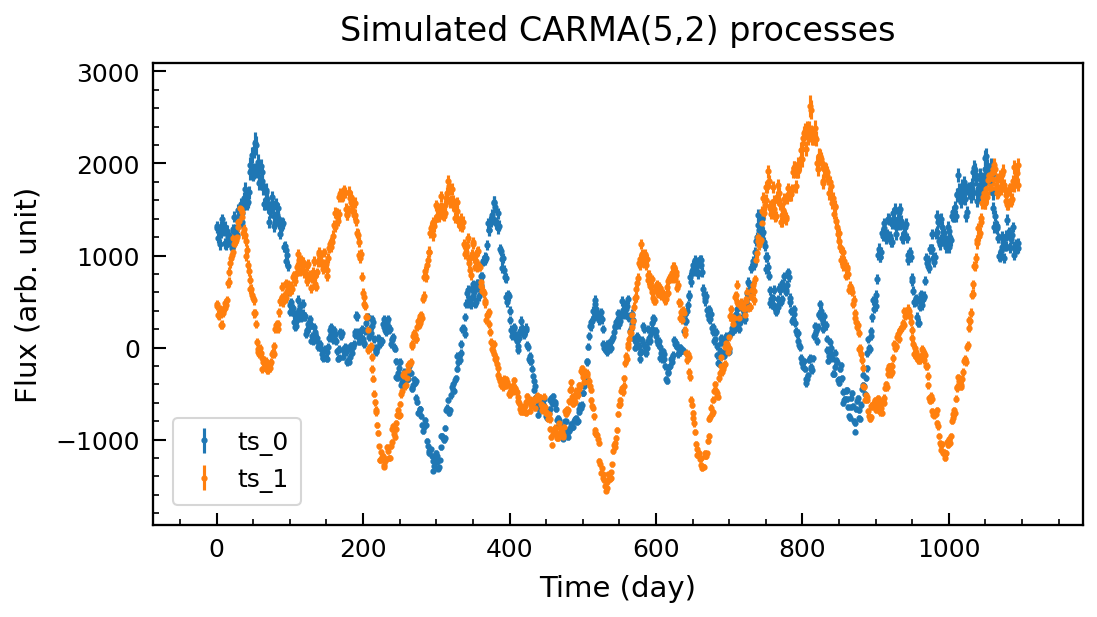

In [10]:
# plot the simulated process
fig, ax = plt.subplots(1,1, dpi=150, figsize=(8,4))

for i in range(nLC):
    ax.errorbar(t[i], y[i], yerr[i], fmt='.', label=f'ts_{i}', markersize=4)

ax.set_xlabel('Time (day)')
ax.set_ylabel('Flux (arb. unit)')
ax.set_title('Simulated CARMA(5,2) processes')
ax.legend(markerscale=1, loc=3)

- #### At provided specific timestamps

>*__Note:__* For very high-order models, extremely high cadence may introduce numerical instability at solving the covariance within $\mathit{celerite}$.

In [11]:
# randomly draw timestamps from a log distribution
tIn = np.logspace(0, np.log10(2000), 500)

tOut, yOut, yerrOut = gpSimByT(carma_kernel, 20, tIn, nLC=nLC)

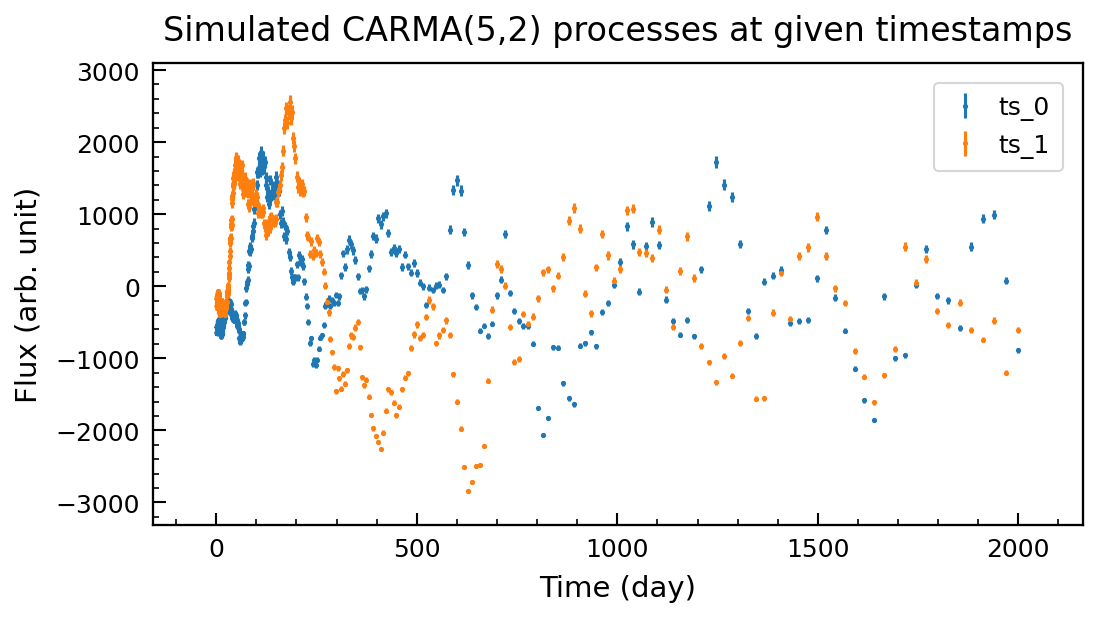

In [12]:
# plot the simulated process
fig, ax = plt.subplots(1,1, dpi=150, figsize=(8,4))

for i in range(nLC):
    ax.errorbar(tOut[i], yOut[i], yerrOut[i], fmt='.', label=f'ts_{i}', markersize=3)

ax.set_xlabel('Time (day)')
ax.set_ylabel('Flux (arb. unit)')
ax.set_title('Simulated CARMA(5,2) processes at given timestamps')
ax.legend(markerscale=1)